<a href="https://colab.research.google.com/github/AhmedCode99/HW4_Ahmed/blob/main/projectile_motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

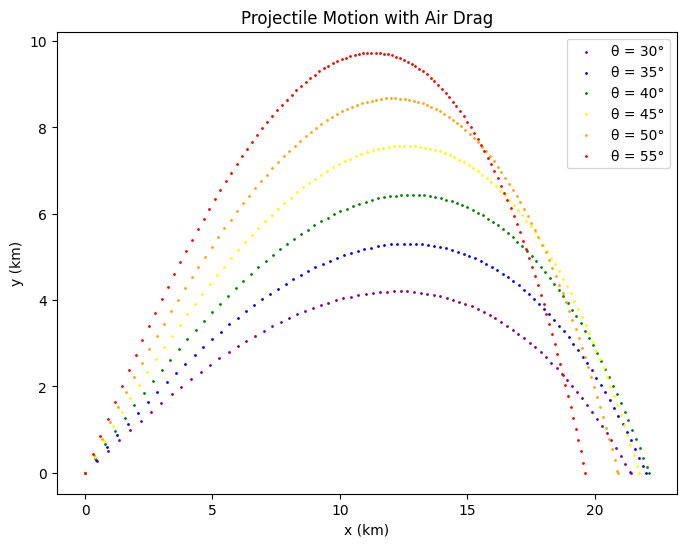

In [ ]:
import math
import matplotlib.pyplot as plt


g = 9.81 # m / s^2
dt = 0.75 # time step in seconds

x_start = 0 # starting x position
y_start = 0 #starting y position

const = 4*(10**-5) # Air Drag B_2 constant (1 / meter)

v_initial = 700 # meters per second

angle_degree = [30,35,40,45,50,55] # launch angle in degree
angle = [math.radians(degrees) for degrees in angle_degree] #convert launch angle to radians

x_list=[] #list to store x postions
y_list=[] #list to store y postions

for j in range(len(angle)): # loop over launch angles

  vx = v_initial*math.cos(angle[j]) # intial x velocity
  vy = v_initial*math.sin(angle[j]) # initial y velocity

  x=[x_start] # list to store x postions
  y=[y_start] # list to store y postions

  i = 0 # index for while loop

  while y[-1]>=0: # loop to calculate x and y positions
    x.append(x[i]+vx*dt) # calculate and save x
    y.append(y[i]+vy*dt) # calculate and save y
    vx=vx-const*dt*vx*math.sqrt((vx**2)+(vy**2)) # update x velocity
    vy=vy-dt*(g+const*vy*math.sqrt((vx**2)+(vy**2))) # update y velocity
    i=i+1 # update index

  #interpolate between last two points to determine final position
  r = -y[-2]/y[-1]
  x[-1] = (x[-2]+r*x[-1])/(r+1)
  y[-1]=0.0

  # saving x and y positions
  x_list.append(x)
  y_list.append(y)

#plotting

colours=["purple","blue","green","yellow","orange","red"] # list of colours
plt.figure(figsize=(8,6)) # set plot size
for i in range(len(x_list)): # plotting trajectory for each launch angle
    plt.scatter(list(map(lambda z: z/1000, x_list[i])),list(map(lambda z: z/1000, y_list[i])), # converting from m to km
                c=colours[i],s=1,label='θ = {}°'.format(angle_degree[i])) # colours and legends
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.legend()
plt.title("Projectile Motion with Air Drag")
plt.show()